# Import Libraries

In [61]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # this is used for the plot the graph
import seaborn as sns # used for plot interactive graph.
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.preprocessing import StandardScaler # for normalization

# Regression models
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import ElasticNet
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error, median_absolute_error, root_mean_squared_error

import warnings 
warnings.filterwarnings('ignore')

# Import Dataset

In [62]:
df = pd.read_csv("Tokyo_20183_20233_en.csv", encoding="latin1")
df.head()

,Type,Price information classification,Area,"City,Town,Ward,Village code",Prefecture,"City,Town,Ward,Village",District,Nearest station : Name,Nearest station : Distance,Total transaction value,...,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56
0,"Pre-owned Condominiums, etc.",Contract Price Information,NaN,13101,Tokyo,Chiyoda Ward,Iwamotocho,Iwamotocho,4,53000000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Pre-owned Condominiums, etc.",Contract Price Information,NaN,13101,Tokyo,Chiyoda Ward,Iwamotocho,Iwamotocho,4,33000000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Pre-owned Condominiums, etc.",Contract Price Information,NaN,13101,Tokyo,Chiyoda Ward,Iwamotocho,Iwamotocho,2,27000000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Pre-owned Condominiums, etc.",Contract Price Information,NaN,13101,Tokyo,Chiyoda Ward,Iwamotocho,Akihabara,5,49000000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Pre-owned Condominiums, etc.",Contract Price Information,NaN,13101,Tokyo,Chiyoda Ward,Iwamotocho,Kodemmacho,2,69000000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Dataset Pre-processing

In [63]:
df.shape # Print the rows and columns of the data

(234312, 57)

In [64]:
df.isnull().sum() # Check for missing values

Type                                     0
Price information classification         0
Area                                152331
City,Town,Ward,Village code              0
Prefecture                               0
City,Town,Ward,Village                   0
District                                 0
Nearest station : Name                1451
Nearest station : Distance            4549
Total transaction value                  0
Layout                               86477
Area(u)                                 0
Land : Price per u                 208876
Land : Shape                        152356
Frontage                            159897
Building : Total floor area         166741
Building : Construction year         32203
Building : Structure                 32280
Use                                 113586
Purpose of use                       75875
Frontage road : Direction           140916
Frontage road : Type                141487
Frontage road : Width               142495
City planni

In [65]:
# remove columns from Unnamed: 29 to Unnamed: 56
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df = df.drop(["Transaction factors"], axis=1)
df.shape

(234312, 28)

In [66]:
df.columns # Print the column names

Index(['Type', 'Price information classification', 'Area',
       'City,Town,Ward,Village code', 'Prefecture', 'City,Town,Ward,Village',
       'District', 'Nearest station : Name', 'Nearest station : Distance',
       'Total transaction value', 'Layout', 'Area(u)', 'Land : Price per u',
       'Land : Shape', 'Frontage', 'Building : Total floor area',
       'Building : Construction year', 'Building : Structure', 'Use',
       'Purpose of use', 'Frontage road : Direction', 'Frontage road : Type',
       'Frontage road : Width', 'City planning', 'Building coverage ratio',
       'Floor area ratio', 'Transaction timing', 'Renovation'],
      dtype='object')

In [67]:
# store all data for 3rd quarter 2022, 4th quarter 2022, 1st quarter 2023, 2nd quarter 2023 and 3rd quarter 2023
df = df[(df["Transaction timing"] == "3rd quarter 2022") | (df["Transaction timing"] == "4th quarter 2022") | (df["Transaction timing"] == "1st quarter 2023") | (df["Transaction timing"] == "2nd quarter 2023") | (df["Transaction timing"] == "3rd quarter 2023")]
df.head()

,Type,Price information classification,Area,"City,Town,Ward,Village code",Prefecture,"City,Town,Ward,Village",District,Nearest station : Name,Nearest station : Distance,Total transaction value,...,Use,Purpose of use,Frontage road : Direction,Frontage road : Type,Frontage road : Width,City planning,Building coverage ratio,Floor area ratio,Transaction timing,Renovation
275,"Pre-owned Condominiums, etc.",Contract Price Information,NaN,13101,Tokyo,Chiyoda Ward,Iwamotocho,Bakurocho,3,18000000.0,...,NaN,NaN,NaN,NaN,NaN,Commerical,NaN,NaN,3rd quarter 2022,NaN
276,"Pre-owned Condominiums, etc.",Contract Price Information,NaN,13101,Tokyo,Chiyoda Ward,Iwamotocho,Iwamotocho,3,34000000.0,...,NaN,NaN,NaN,NaN,NaN,Commerical,NaN,NaN,3rd quarter 2022,NaN
277,"Pre-owned Condominiums, etc.",Contract Price Information,NaN,13101,Tokyo,Chiyoda Ward,Iwamotocho,Iwamotocho,5,37000000.0,...,NaN,NaN,NaN,NaN,NaN,Commerical,NaN,NaN,3rd quarter 2022,NaN
278,"Pre-owned Condominiums, etc.",Contract Price Information,NaN,13101,Tokyo,Chiyoda Ward,Iwamotocho,Kodemmacho,3,24000000.0,...,NaN,NaN,NaN,NaN,NaN,Commerical,NaN,NaN,3rd quarter 2022,NaN
279,"Pre-owned Condominiums, etc.",Contract Price Information,NaN,13101,Tokyo,Chiyoda Ward,Iwamotocho,Iwamotocho,4,52000000.0,...,NaN,NaN,NaN,NaN,NaN,Commerical,NaN,NaN,3rd quarter 2022,NaN


In [68]:
df.isnull().sum() / df.shape[0] * 100 # Check for missing values by percentage

Type                                 0.000000
Price information classification     0.000000
Area                                75.821261
City,Town,Ward,Village code          0.000000
Prefecture                           0.000000
City,Town,Ward,Village               0.000000
District                             0.000000
Nearest station : Name               0.914983
Nearest station : Distance           2.881561
Total transaction value              0.000000
Layout                              26.077011
Area(u)                             0.000000
Land : Price per u                 92.583238
Land : Shape                        75.827615
Frontage                            78.173847
Building : Total floor area         75.115961
Building : Construction year        10.129940
Building : Structure                10.398399
Use                                 60.527068
Purpose of use                      49.404308
Frontage road : Direction           68.253590
Frontage road : Type              

In [69]:
# remove columns with over 40% missing values
df = df.drop(["Area", "Land : Price per u", "Land : Shape", "Frontage", "Building : Total floor area", "Use", "Purpose of use", "Frontage road : Direction", "Frontage road : Type", "Frontage road : Width", "Renovation"], axis=1)
#Convert Nearest station : Distance to numeric
df['Nearest station : Distance'] = pd.to_numeric(df['Nearest station : Distance'],errors = 'coerce')
df = df.dropna(subset=['Nearest station : Distance'])
df.isnull().sum() / df.shape[0] * 100 # Check for missing values by percentage
#df.shape

Type                                 0.000000
Price information classification     0.000000
City,Town,Ward,Village code          0.000000
Prefecture                           0.000000
City,Town,Ward,Village               0.000000
District                             0.000000
Nearest station : Name               0.003320
Nearest station : Distance           0.000000
Total transaction value              0.000000
Layout                              25.774000
Area(u)                             0.000000
Building : Construction year         9.135278
Building : Structure                 9.495510
City planning                        4.980162
Building coverage ratio             38.519896
Floor area ratio                    38.521556
Transaction timing                   0.000000
dtype: float64

In [70]:
df.info() # Print a concise summary of the data

<class 'pandas.core.frame.DataFrame'>
Index: 60239 entries, 275 to 233966
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Type                              60239 non-null  object 
 1   Price information classification  60239 non-null  object 
 2   City,Town,Ward,Village code       60239 non-null  int64  
 3   Prefecture                        60239 non-null  object 
 4   City,Town,Ward,Village            60239 non-null  object 
 5   District                          60239 non-null  object 
 6   Nearest station : Name            60237 non-null  object 
 7   Nearest station : Distance        60239 non-null  float64
 8   Total transaction value           60239 non-null  float64
 9   Layout                            44713 non-null  object 
 10  Area(u)                          60239 non-null  object 
 11  Building : Construction year      54736 non-null  object 
 12  Buildi

In [71]:
df.describe() # Generate descriptive statistics

,"City,Town,Ward,Village code",Nearest station : Distance,Total transaction value,Building coverage ratio,Floor area ratio
count,60239.000000,60239.000000,6.023900e+04,37035.000000,37034.000000
mean,13133.877969,8.553761,6.931024e+07,62.995599,270.068937
std,42.085494,5.375689,2.224903e+08,13.181906,158.328019
min,13101.000000,0.000000,1.000000e+03,30.000000,40.000000
25%,13108.000000,5.000000,2.800000e+07,60.000000,150.000000
50%,13115.000000,8.000000,4.500000e+07,60.000000,200.000000
75%,13122.000000,11.000000,7.000000e+07,80.000000,400.000000
max,13308.000000,29.000000,3.000000e+10,300.000000,4080.000000


In [72]:
#Impute missing numerical values with mean
numeric_cols = df.select_dtypes(include=["float64", "int64"]).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

#Impute missing numerical values with Regression Imputation
#numeric_cols = df.select_dtypes(include=["float64", "int64"]).columns
#Features to use as predictors
#predictor_vars = ['var4', 'var5', 'var6']

# Impute missing categorical values with mode
categorical_cols = df.select_dtypes(include=["object"]).columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

# Verify if missing values are filled
df.isnull().sum()

Type                                0
Price information classification    0
City,Town,Ward,Village code         0
Prefecture                          0
City,Town,Ward,Village              0
District                            0
Nearest station : Name              0
Nearest station : Distance          0
Total transaction value             0
Layout                              0
Area(u)                            0
Building : Construction year        0
Building : Structure                0
City planning                       0
Building coverage ratio             0
Floor area ratio                    0
Transaction timing                  0
dtype: int64

In [73]:
df.head()

,Type,Price information classification,"City,Town,Ward,Village code",Prefecture,"City,Town,Ward,Village",District,Nearest station : Name,Nearest station : Distance,Total transaction value,Layout,Area(u),Building : Construction year,Building : Structure,City planning,Building coverage ratio,Floor area ratio,Transaction timing
275,"Pre-owned Condominiums, etc.",Contract Price Information,13101,Tokyo,Chiyoda Ward,Iwamotocho,Bakurocho,3.0,18000000.0,1K,25,1981,RC,Commerical,62.995599,270.068937,3rd quarter 2022
276,"Pre-owned Condominiums, etc.",Contract Price Information,13101,Tokyo,Chiyoda Ward,Iwamotocho,Iwamotocho,3.0,34000000.0,1R,25,2020,RC,Commerical,62.995599,270.068937,3rd quarter 2022
277,"Pre-owned Condominiums, etc.",Contract Price Information,13101,Tokyo,Chiyoda Ward,Iwamotocho,Iwamotocho,5.0,37000000.0,1K,25,2018,RC,Commerical,62.995599,270.068937,3rd quarter 2022
278,"Pre-owned Condominiums, etc.",Contract Price Information,13101,Tokyo,Chiyoda Ward,Iwamotocho,Kodemmacho,3.0,24000000.0,1K,25,2002,SRC,Commerical,62.995599,270.068937,3rd quarter 2022
279,"Pre-owned Condominiums, etc.",Contract Price Information,13101,Tokyo,Chiyoda Ward,Iwamotocho,Iwamotocho,4.0,52000000.0,1LDK,45,2015,RC,Commerical,62.995599,270.068937,3rd quarter 2022


In [74]:
# convert Total transaction value from float to int
df["Total transaction value"] = df["Total transaction value"].astype(int)

In [75]:
# function to remove outliers from the dataframe

def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] > lower_bound) & (df[column] < upper_bound)]
    return df

# remove outliers from the dataframe
df = remove_outliers(df, "Total transaction value")
df.shape

(56207, 17)

# Important Features

In [76]:
df_copy = df.copy()

for cols in df_copy.columns:
    if df_copy[cols].dtype == "object":
        df_copy[cols] = df_copy[cols].astype("category").cat.codes

Feature Importance:
                             Feature  Importance
8                             Layout    0.317436
2        City,Town,Ward,Village code    0.208174
10      Building : Construction year    0.115244
9                           Area(u)    0.108078
0                               Type    0.045848
4             City,Town,Ward,Village    0.045401
11              Building : Structure    0.030808
7         Nearest station : Distance    0.026053
12                     City planning    0.022074
13           Building coverage ratio    0.020373
14                  Floor area ratio    0.018885
6             Nearest station : Name    0.013689
5                           District    0.011373
1   Price information classification    0.010443
15                Transaction timing    0.006120
3                         Prefecture    0.000000


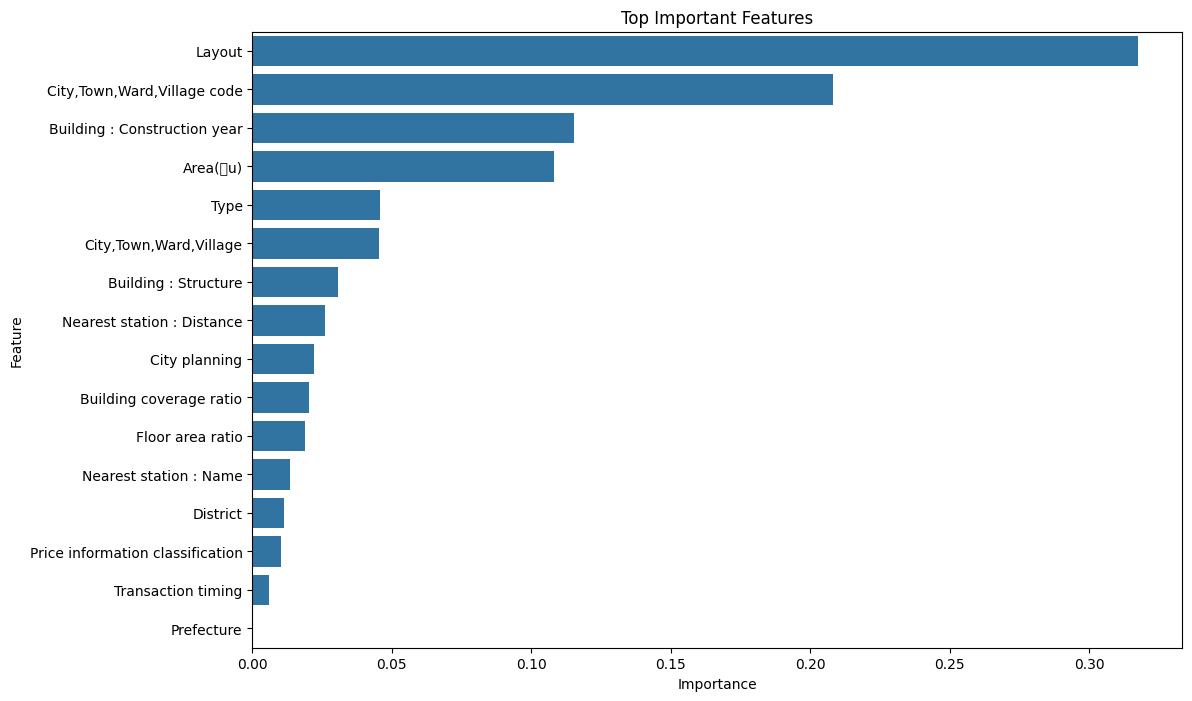

In [77]:
scaler = StandardScaler()  # Instantiate the StandardScaler
X_df = df_copy.drop(["Total transaction value"], axis=1)  # Features
y_df = df_copy["Total transaction value"]  # Target

X_scaled = scaler.fit_transform(X_df)  # Fit and transform the data
X_df_scaled = pd.DataFrame(
    X_scaled, columns=X_df.columns
)  # Convert back to DataFrame with original column names

# Define and train your XGBoost model
xgb_model = XGBRegressor()
xgb_model.fit(X_df_scaled, y_df)

# Get feature importances
feature_importance = xgb_model.feature_importances_
feature_names = X_df.columns.tolist()  # Get feature names from original DataFrame

# Create DataFrame to store feature importance
feature_importance_df = pd.DataFrame(
    {"Feature": feature_names, "Importance": feature_importance}
)

# Sort features based on importance
feature_importance_df = feature_importance_df.sort_values(
    by="Importance", ascending=False
)

# Print feature importance
print("Feature Importance:")
print(feature_importance_df)

# Plotting feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x="Importance", y="Feature", data=feature_importance_df.head(20))
plt.title("Top Important Features")
plt.show()

In [78]:
df.columns

Index(['Type', 'Price information classification',
       'City,Town,Ward,Village code', 'Prefecture', 'City,Town,Ward,Village',
       'District', 'Nearest station : Name', 'Nearest station : Distance',
       'Total transaction value', 'Layout', 'Area(u)',
       'Building : Construction year', 'Building : Structure', 'City planning',
       'Building coverage ratio', 'Floor area ratio', 'Transaction timing'],
      dtype='object')

In [79]:
# Keep the first 5 important features
df = df[
    [
        "Layout",
        "City,Town,Ward,Village code",
        "Building : Construction year",
        "Area(u)",
        "City,Town,Ward,Village",
        "Total transaction value"
    ]
]



In [80]:
# store only Minato Ward data under City,Town,Ward,Village column
minato_df = df[df["City,Town,Ward,Village"] == "Minato Ward"]
minato_df.head()

,Layout,"City,Town,Ward,Village code",Building : Construction year,Area(u),"City,Town,Ward,Village",Total transaction value
10469,1LDK,13103,2014,45,Minato Ward,110000000
10476,1R,13103,2002,40,Minato Ward,68000000
10477,1K,13103,2002,45,Minato Ward,73000000
10478,1LDK+S,13103,2002,70,Minato Ward,100000000
10479,2LDK,13103,2014,55,Minato Ward,78000000


In [81]:
# store only Katsushika Ward data under City,Town,Ward,Village column
Katsushika_df = df[df["City,Town,Ward,Village"] == "Katsushika Ward"]
Katsushika_df.head()

,Layout,"City,Town,Ward,Village code",Building : Construction year,Area(u),"City,Town,Ward,Village",Total transaction value
161959,3LDK,13122,2003,70,Katsushika Ward,34000000
161960,2LDK,13122,2012,55,Katsushika Ward,37000000
161961,3LDK,13122,2013,65,Katsushika Ward,33000000
161962,1DK+S,13122,1980,45,Katsushika Ward,16000000
161963,3LDK,13122,2003,70,Katsushika Ward,39000000


In [82]:
# encode the categorical variables for overall data
for cols in df.columns:
    if df[cols].dtype == "object":
        df[cols] = pd.Categorical(df[cols])
        df[cols] = df[cols].cat.codes
        
df.head()

,Layout,"City,Town,Ward,Village code",Building : Construction year,Area(u),"City,Town,Ward,Village",Total transaction value
275,2,13101,35,43,5,18000000
276,8,13101,74,43,5,34000000
277,2,13101,72,43,5,37000000
278,2,13101,56,43,5,24000000
279,4,13101,69,78,5,52000000


In [83]:
# encode the categorical variables for Minato Ward
for cols in minato_df.columns:
    if minato_df[cols].dtype == "object":
        minato_df[cols] = pd.Categorical(minato_df[cols])
        minato_df[cols] = minato_df[cols].cat.codes
        
minato_df.head()

,Layout,"City,Town,Ward,Village code",Building : Construction year,Area(u),"City,Town,Ward,Village",Total transaction value
10469,3,13103,52,14,0,110000000
10476,5,13103,40,13,0,68000000
10477,1,13103,40,14,0,73000000
10478,4,13103,40,19,0,100000000
10479,8,13103,52,16,0,78000000


In [84]:
# encode the categorical variables for Katsushika Ward
for cols in Katsushika_df.columns:
    if Katsushika_df[cols].dtype == "object":
        Katsushika_df[cols] = pd.Categorical(Katsushika_df[cols])
        Katsushika_df[cols] = Katsushika_df[cols].cat.codes
        
Katsushika_df.head()

,Layout,"City,Town,Ward,Village code",Building : Construction year,Area(u),"City,Town,Ward,Village",Total transaction value
161959,13,13122,43,49,0,34000000
161960,9,13122,52,46,0,37000000
161961,13,13122,53,48,0,33000000
161962,1,13122,20,44,0,16000000
161963,13,13122,43,49,0,39000000


# Visualizations

### Overall Dataset

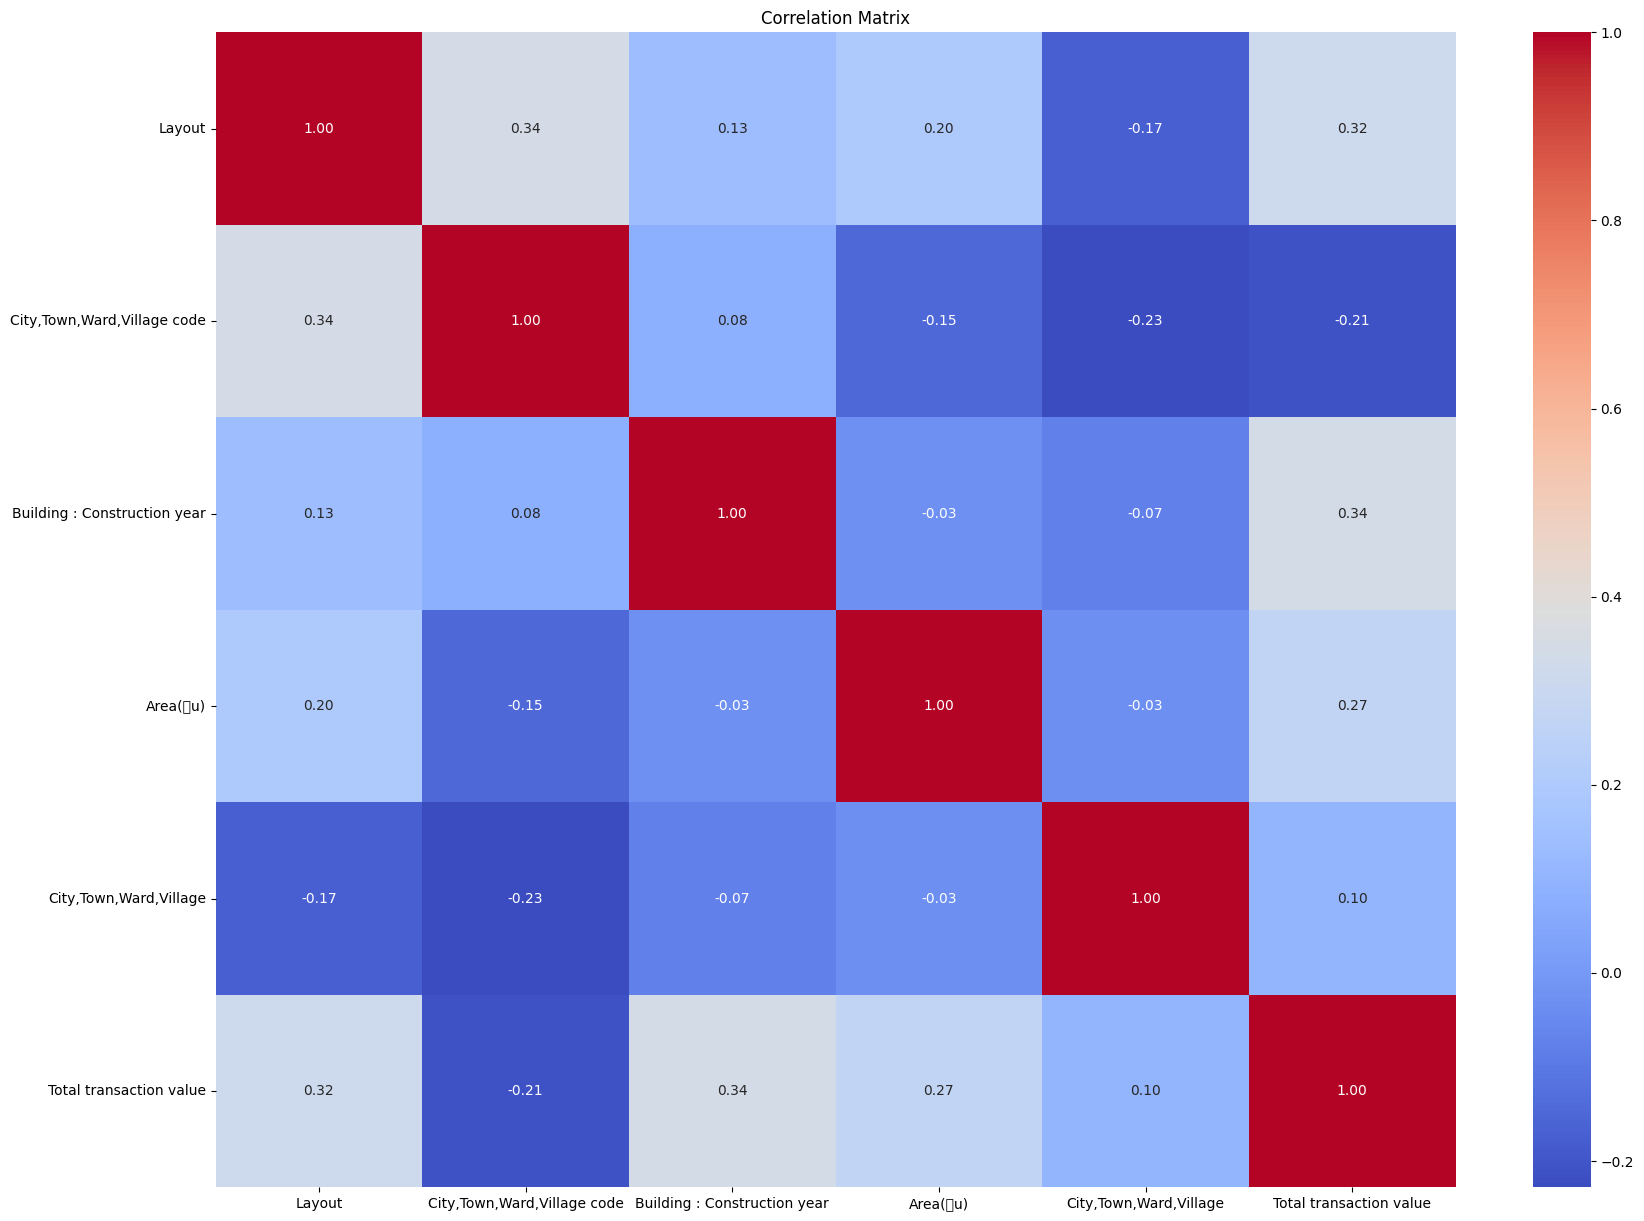

In [85]:
# Calculate correlation matrix
corr_matrix = df.corr()

# Plotting the heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

### Minato Ward

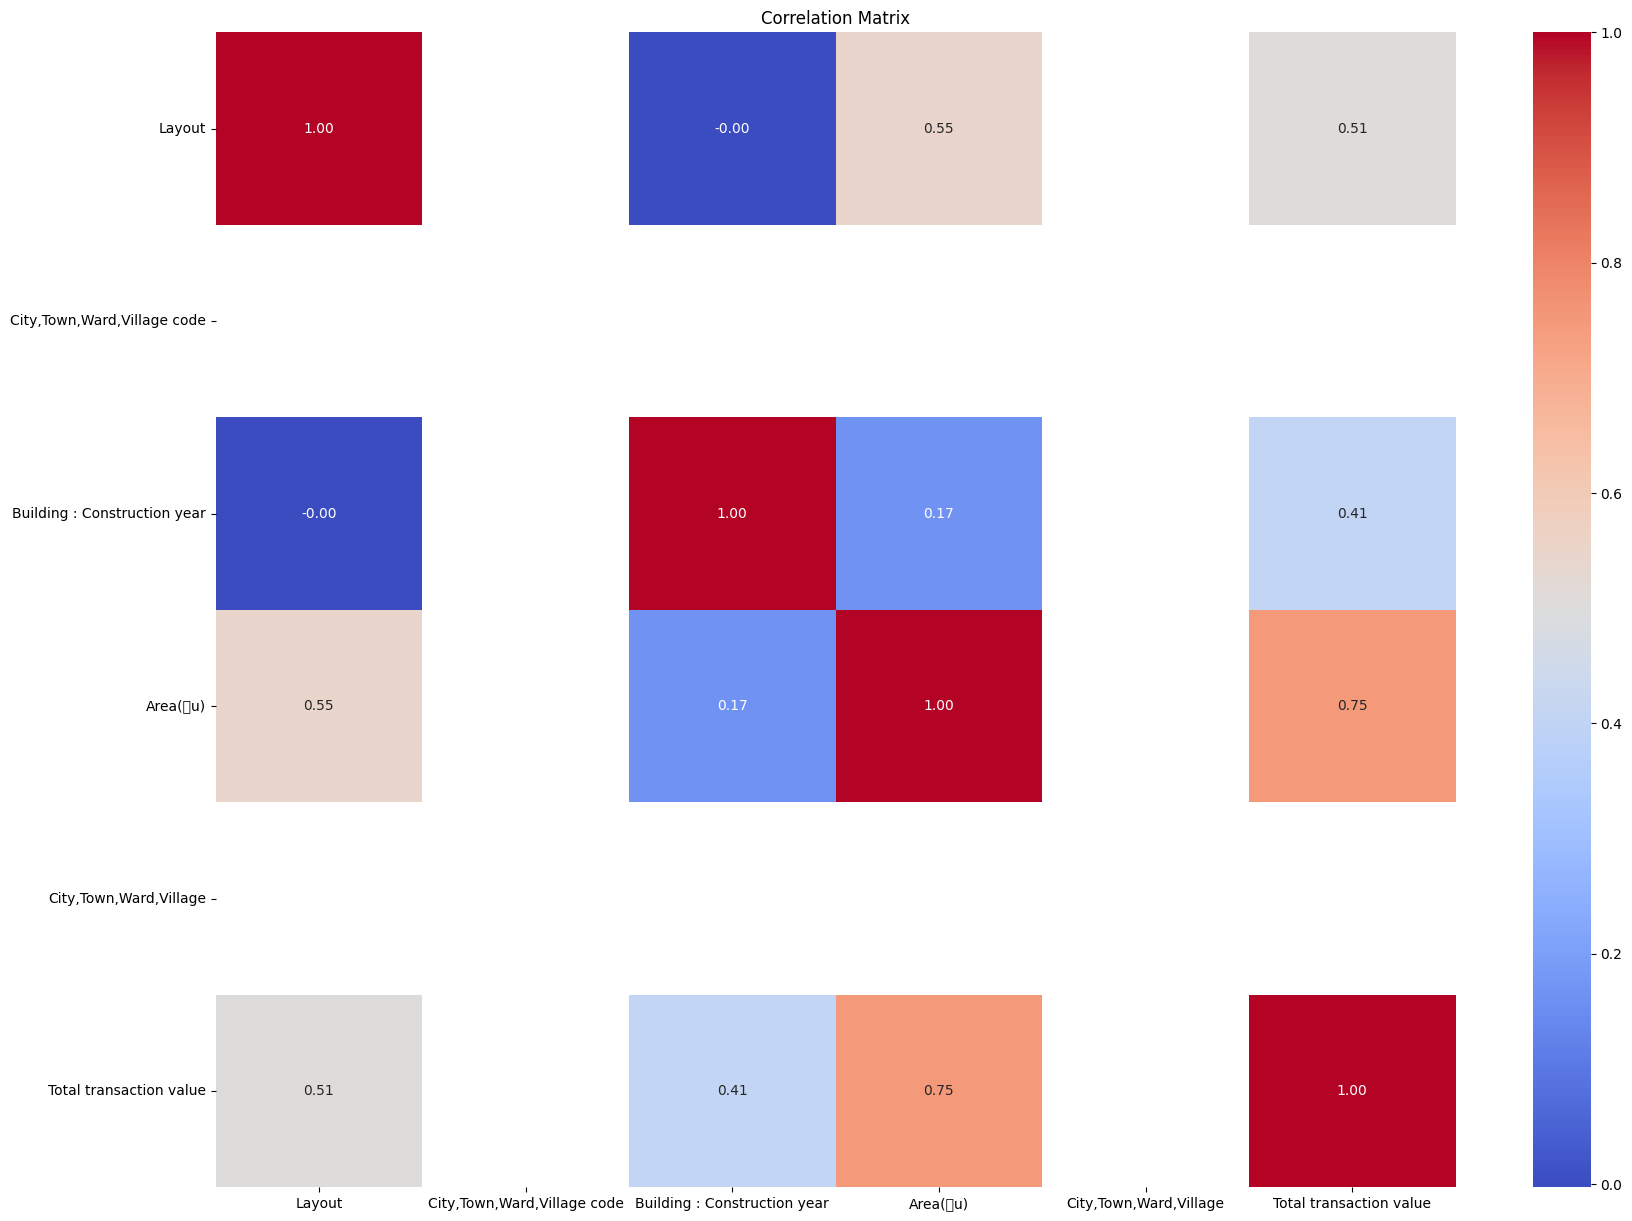

In [86]:
# Calculate correlation matrix
corr_matrix = minato_df.corr()

# Plotting the heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

### Katsushika Ward

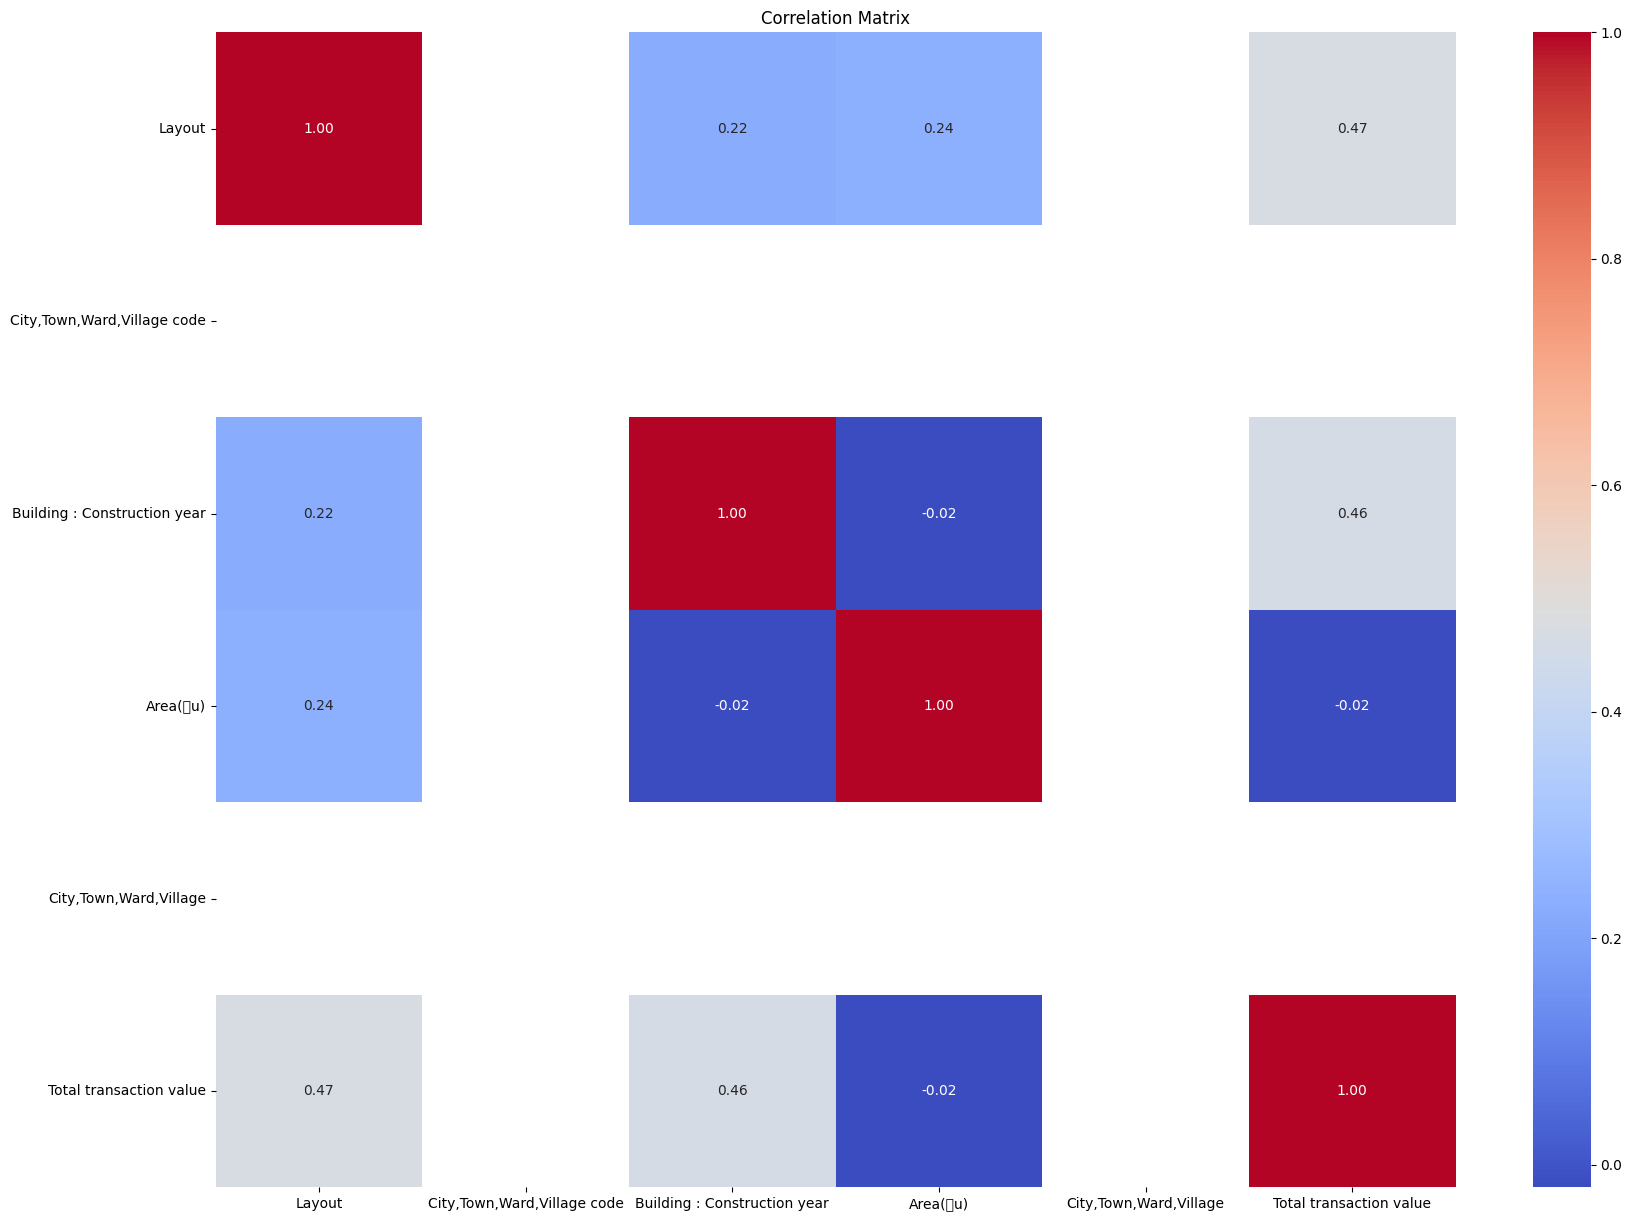

In [87]:
# Calculate correlation matrix
corr_matrix = Katsushika_df.corr()

# Plotting the heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Standardization

###  Overall Dataset

In [88]:
scaler = StandardScaler() # Instantiate the StandardScaler
X_df = df.drop(["Total transaction value"], axis=1) # Features
y_df = df["Total transaction value"] # Target

X_df = scaler.fit_transform(X_df) # Fit and transform the data

### Minato Ward

In [89]:
scaler = StandardScaler()  # Instantiate the StandardScaler
minato_X_df = minato_df.drop(["Total transaction value"], axis=1)  # Features
minatao_y_df = minato_df["Total transaction value"]  # Target

minato_X_df = scaler.fit_transform(minato_X_df)  # Fit and transform the data

###  Katsushika Ward

In [90]:
scaler = StandardScaler()  # Instantiate the StandardScaler
Katsushika_X_df = Katsushika_df.drop(["Total transaction value"], axis=1)  # Features
Katsushika_y_df = Katsushika_df["Total transaction value"]  # Target

Katsushika_X_df = scaler.fit_transform(Katsushika_X_df)  # Fit and transform the data

#  Split the Dataset

### Overall Dataset

In [91]:
X_train, X_test, y_train, y_test = train_test_split(
    X_df, y_df, test_size=0.2, random_state=42
)

###  Minato Ward

In [92]:
minato_X_train, minato_X_test, minato_y_train, minato_y_test = train_test_split(
    minato_X_df, minatao_y_df, test_size=0.2, random_state=42
)

### Katsushika Ward

In [93]:
Katsushika_X_train, Katsushika_X_test, Katsushika_y_train, Katsushika_y_test = (
    train_test_split(Katsushika_X_df, Katsushika_y_df, test_size=0.2, random_state=42)
)

#  Model Building

##  XGB Boost

### XGB Boost for Overall Dataset

In [94]:
print("Evaluation for XGBRegressor".center(75, "_"))

xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)

xgb_prediction = xgb_model.predict(X_test)
xgb_mae = mean_absolute_error(y_test, xgb_prediction)
xgb_mse = mean_squared_error(y_test, xgb_prediction)
xgb_r2 = r2_score(y_test, xgb_prediction)
xgb_mape = mean_absolute_percentage_error(y_test, xgb_prediction)
xgb_medae = median_absolute_error(y_test, xgb_prediction)
xgb_rmse = mean_squared_error(y_test, xgb_prediction, squared=False)  # Calculate RMSE

print("_" * 75)
print(f"Mean Absolute Error: {xgb_mae}")
print(f"Mean Squared Error: {xgb_mse}")
print(f"Root Mean Squared Error: {xgb_rmse}")
print(f"R2 Score: {xgb_r2}")
print(f"Mean Absolute Percentage Error: {xgb_mape}")
print(f"Median Absolute Error: {xgb_medae}")
print("_" * 75)

total_xgb_predictions = xgb_prediction
#minato_xgb_prediction + Katsushika_xgb_prediction
print("Total XGB Predictions:", len(total_xgb_predictions))
#print("Total XGB Predictions:", xgb_prediction) 
#print("Total values for prediction:", len(y_test))

________________________Evaluation for XGBRegressor________________________
___________________________________________________________________________
Mean Absolute Error: 9025128.348586773
Mean Squared Error: 177367710372155.0
Root Mean Squared Error: 13317946.927817177
R2 Score: 0.7582758889940119
Mean Absolute Percentage Error: 0.2642034977548289
Median Absolute Error: 5942871.0
___________________________________________________________________________
Total XGB Predictions: 11242


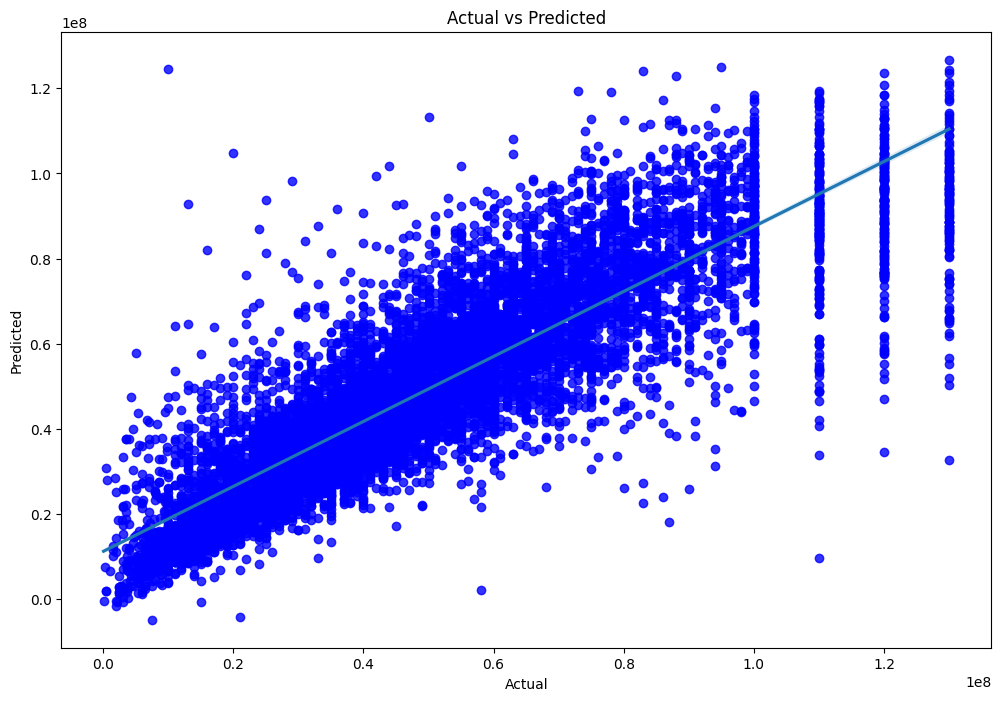

In [95]:
# Plot the actual vs predicted values using seaborn scatterplot with best fit line
plt.figure(figsize=(12, 8))
sns.regplot(x=y_test, y=xgb_prediction, scatter_kws={"color": "blue"})
plt.title("Actual vs Predicted")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

### XGB Boost for Minato Ward

In [96]:
print("Evaluation for XGBRegressor".center(75, "_"))

minato_xgb_model = XGBRegressor()
minato_xgb_model.fit(minato_X_train, minato_y_train)

minato_xgb_prediction = xgb_model.predict(minato_X_test)
minato_xgb_mae = mean_absolute_error(minato_y_test, minato_xgb_prediction)
minato_xgb_mse = mean_squared_error(minato_y_test, minato_xgb_prediction)
minato_xgb_r2 = r2_score(minato_y_test, minato_xgb_prediction)
minato_xgb_mape = mean_absolute_percentage_error(minato_y_test, minato_xgb_prediction)
minato_xgb_medae = median_absolute_error(minato_y_test, minato_xgb_prediction)
minato_xgb_rmse = mean_squared_error(
    minato_y_test, minato_xgb_prediction, squared=False
)  # Calculate RMSE

print("_" * 75)
print(f"Mean Absolute Error: {minato_xgb_mae}")
print(f"Mean Squared Error: {minato_xgb_mse}")
print(f"Root Mean Squared Error: {minato_xgb_rmse}")
print(f"R2 Score: {minato_xgb_r2}")
print(f"Mean Absolute Percentage Error: {minato_xgb_mape}")
print(f"Median Absolute Error: {minato_xgb_medae}")
print("_" * 75)

________________________Evaluation for XGBRegressor________________________
___________________________________________________________________________
Mean Absolute Error: 29251663.101174936
Mean Squared Error: 1350352401958391.2
Root Mean Squared Error: 36747141.41206621
R2 Score: -0.13826174172220518
Mean Absolute Percentage Error: 0.6680967811947371
Median Absolute Error: 24874432.0
___________________________________________________________________________


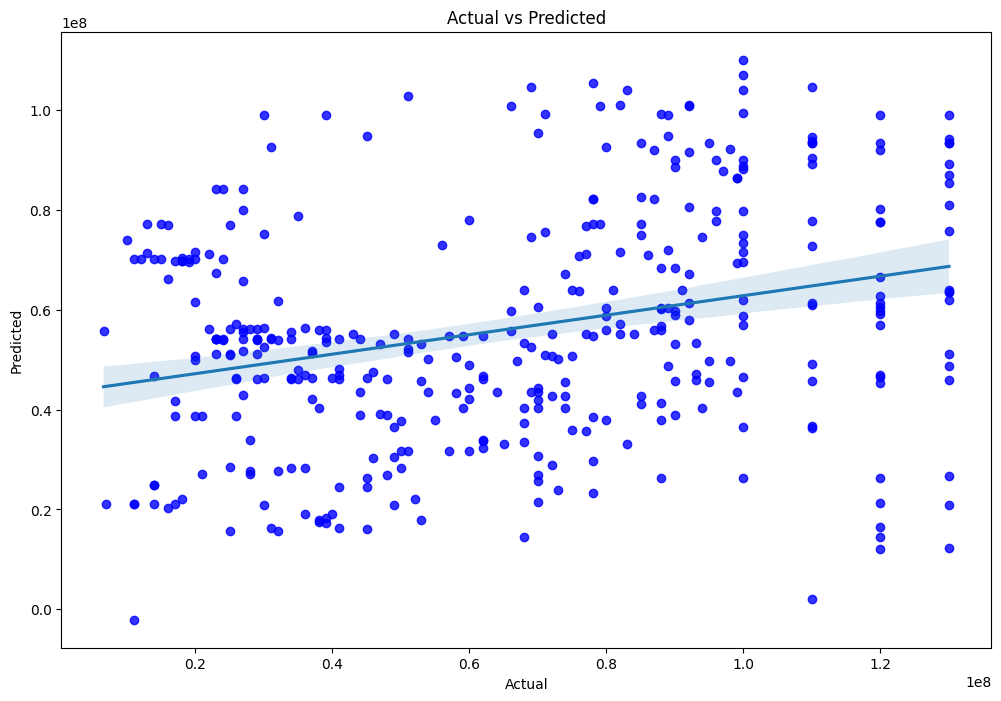

In [97]:
# Plot the actual vs predicted values using seaborn scatterplot with best fit line
plt.figure(figsize=(12, 8))
sns.regplot(x=minato_y_test, y=minato_xgb_prediction, scatter_kws={"color": "blue"})
plt.title("Actual vs Predicted")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

### XGB Boost for Katsushika Ward

In [98]:
print("Evaluation for XGBRegressor".center(75, "_"))

Katsushika_xgb_model = XGBRegressor()
Katsushika_xgb_model.fit(Katsushika_X_train, Katsushika_y_train)

Katsushika_xgb_prediction = Katsushika_xgb_model.predict(Katsushika_X_test)
Katsushika_xgb_mae = mean_absolute_error(Katsushika_y_test, Katsushika_xgb_prediction)
Katsushika_xgb_mse = mean_squared_error(Katsushika_y_test, Katsushika_xgb_prediction)
Katsushika_xgb_r2 = r2_score(Katsushika_y_test, Katsushika_xgb_prediction)
Katsushika_xgb_mape = mean_absolute_percentage_error(
    Katsushika_y_test, Katsushika_xgb_prediction
)
Katsushika_xgb_medae = median_absolute_error(
    Katsushika_y_test, Katsushika_xgb_prediction
)
Katsushika_xgb_rmse = mean_squared_error(
    y_test, xgb_prediction, squared=False
)  # Calculate RMSE

print("_" * 75)
print(f"Mean Absolute Error: {Katsushika_xgb_mae}")
print(f"Mean Squared Error: {Katsushika_xgb_mse}")
print(f"Root Mean Squared Error: {Katsushika_xgb_rmse}")
print(f"R2 Score: {Katsushika_xgb_r2}")
print(f"Mean Absolute Percentage Error: {Katsushika_xgb_mape}")
print(f"Median Absolute Error: {Katsushika_xgb_medae}")
print("_" * 75)

________________________Evaluation for XGBRegressor________________________
___________________________________________________________________________
Mean Absolute Error: 8756279.242622951
Mean Squared Error: 175154699696079.62
Root Mean Squared Error: 13317946.927817177
R2 Score: 0.5807983615535957
Mean Absolute Percentage Error: 0.29277979627007616
Median Absolute Error: 5812078.0
___________________________________________________________________________


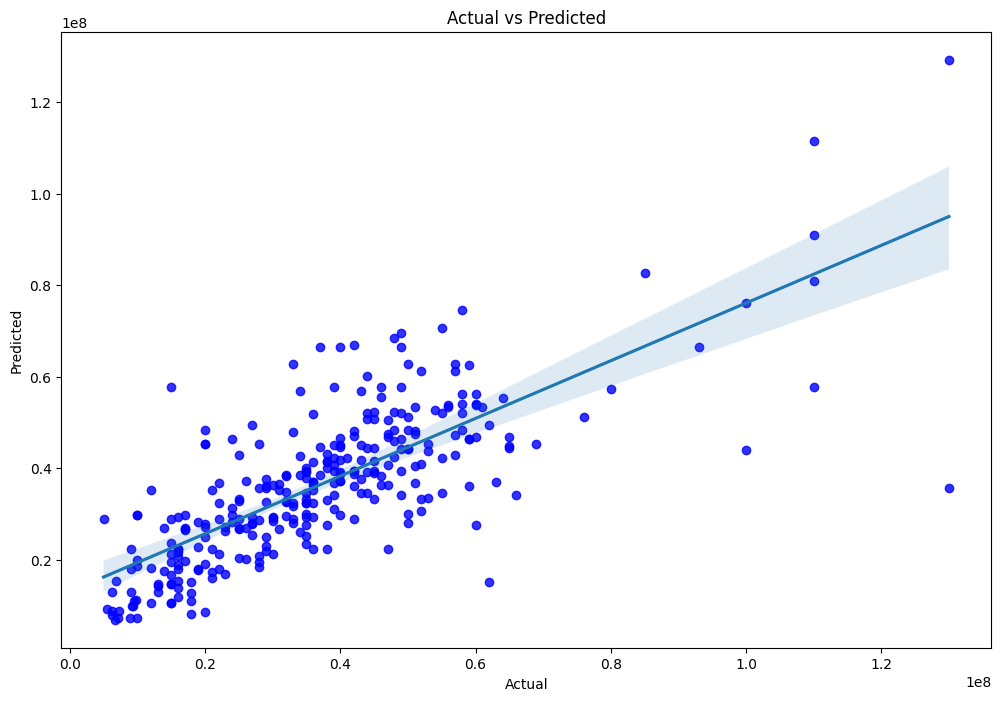

In [99]:
# Plot the actual vs predicted values using seaborn scatterplot with best fit line
plt.figure(figsize=(12, 8))
sns.regplot(
    x=Katsushika_y_test, y=Katsushika_xgb_prediction, scatter_kws={"color": "blue"}
)
plt.title("Actual vs Predicted")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

##  Random Forest

###  Random Forest for Overall Dataset

In [100]:
print("Evaluation for Random Forest Classifier".center(75, "_"))

rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

rf_prediction = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_prediction)
rf_mae = mean_absolute_error(y_test, rf_prediction)
rf_r2 = r2_score(y_test, rf_prediction)
rf_mape = mean_absolute_percentage_error(y_test, rf_prediction)
rf_medae = median_absolute_error(y_test, rf_prediction)
rf_rmse = root_mean_squared_error(y_test, rf_prediction)

print("_" * 75)
print(f"Mean Squared Error: {rf_mse}")
print(f"Mean Absolute Error: {rf_mae}")
print(f"R2 Score: {rf_r2}")
print(f"Mean Absolute Percentage Error: {rf_mape}")
print(f"Median Absolute Error: {rf_medae}")
print(f"Root Mean Squared Error: {rf_rmse}")

print("_" * 75)

__________________Evaluation for Random Forest Classifier__________________
___________________________________________________________________________
Mean Squared Error: 201423166256925.75
Mean Absolute Error: 9401781.603652794
R2 Score: 0.7254921107268779
Mean Absolute Percentage Error: 0.27556258740626977
Median Absolute Error: 5926198.176415093
Root Mean Squared Error: 14192362.95536884
___________________________________________________________________________


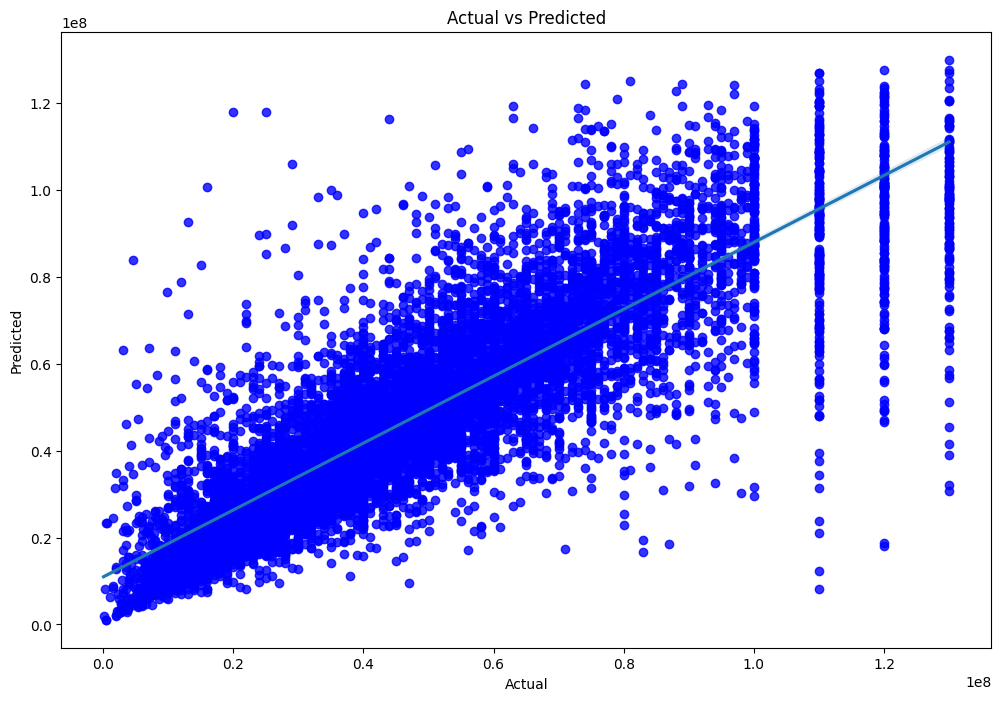

In [101]:
# Plot the actual vs predicted values using seaborn scatterplot with best fit line
plt.figure(figsize=(12, 8))
sns.regplot(x=y_test, y=rf_prediction, scatter_kws={"color": "blue"})
plt.title("Actual vs Predicted")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

### Random Forest for Minato Ward

In [102]:
print("Evaluation for Random Forest Classifier".center(75, "_"))

minato_rf_model = RandomForestRegressor()
minato_rf_model.fit(minato_X_train, minato_y_train)

minato_rf_prediction = minato_rf_model.predict(minato_X_test)
minato_rf_mse = mean_squared_error(minato_y_test, minato_rf_prediction)
minato_rf_mae = mean_absolute_error(minato_y_test, minato_rf_prediction)
minato_rf_r2 = r2_score(minato_y_test, minato_rf_prediction)
minato_rf_mape = mean_absolute_percentage_error(minato_y_test, minato_rf_prediction)
minato_rf_medae = median_absolute_error(minato_y_test, minato_rf_prediction)
minato_rf_rmse = root_mean_squared_error(minato_y_test, minato_rf_prediction)

print("_" * 75)
print(f"Mean Squared Error: {minato_rf_mse}")
print(f"Mean Absolute Error: {minato_rf_mae}")
print(f"R2 Score: {minato_rf_r2}")
print(f"Mean Absolute Percentage Error: {minato_rf_mape}")
print(f"Median Absolute Error: {minato_rf_medae}")
print(f"Root Mean Squared Error: {minato_rf_rmse}")

print("_" * 75)

__________________Evaluation for Random Forest Classifier__________________
___________________________________________________________________________
Mean Squared Error: 365822506521066.94
Mean Absolute Error: 11921503.792750122
R2 Score: 0.6916347445082094
Mean Absolute Percentage Error: 0.22294288501376208
Median Absolute Error: 6974166.666666675
Root Mean Squared Error: 19126487.040778473
___________________________________________________________________________


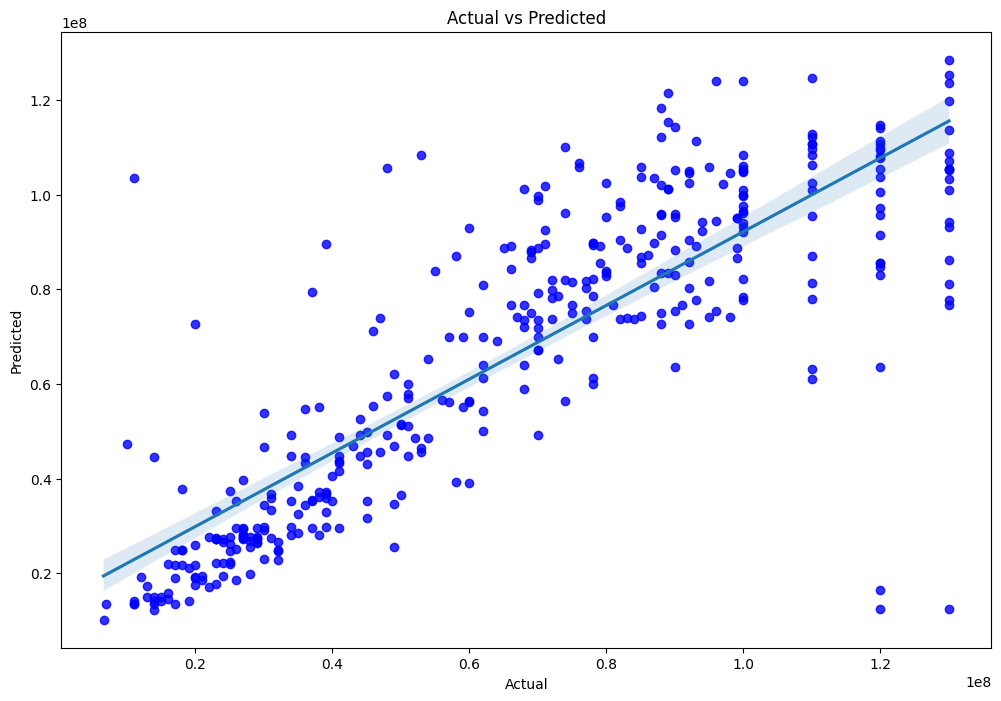

In [103]:
# Plot the actual vs predicted values using seaborn scatterplot with best fit line
plt.figure(figsize=(12, 8))
sns.regplot(x=minato_y_test, y=minato_rf_prediction, scatter_kws={"color": "blue"})
plt.title("Actual vs Predicted")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()


###  Random Forest for Katsushika Ward

In [104]:
print("Evaluation for Random Forest Classifier".center(75, "_"))

Katsushika_rf_model = RandomForestRegressor()
Katsushika_rf_model.fit(Katsushika_X_train, Katsushika_y_train)

Katsushika_rf_prediction = Katsushika_rf_model.predict(Katsushika_X_test)
Katsushika_rf_mse = mean_squared_error(Katsushika_y_test, Katsushika_rf_prediction)
Katsushika_rf_mae = mean_absolute_error(Katsushika_y_test, Katsushika_rf_prediction)
Katsushika_rf_r2 = r2_score(Katsushika_y_test, Katsushika_rf_prediction)
Katsushika_rf_mape = mean_absolute_percentage_error(
    Katsushika_y_test, Katsushika_rf_prediction
)
Katsushika_rf_medae = median_absolute_error(Katsushika_y_test, Katsushika_rf_prediction)
Katsushika_rf_rmse = root_mean_squared_error(
    Katsushika_y_test, Katsushika_rf_prediction
)

print("_" * 75)
print(f"Mean Squared Error: {Katsushika_rf_mse}")
print(f"Mean Absolute Error: {Katsushika_rf_mae}")
print(f"R2 Score: {Katsushika_rf_r2}")
print(f"Mean Absolute Percentage Error: {Katsushika_rf_mape}")
print(f"Median Absolute Error: {Katsushika_rf_medae}")
print(f"Root Mean Squared Error: {Katsushika_rf_rmse}")

print("_" * 75)

__________________Evaluation for Random Forest Classifier__________________
___________________________________________________________________________
Mean Squared Error: 204721805883270.38
Mean Absolute Error: 9124710.24680406
R2 Score: 0.5100347487056637
Mean Absolute Percentage Error: 0.30715289823220343
Median Absolute Error: 6260000.0
Root Mean Squared Error: 14308102.805168489
___________________________________________________________________________


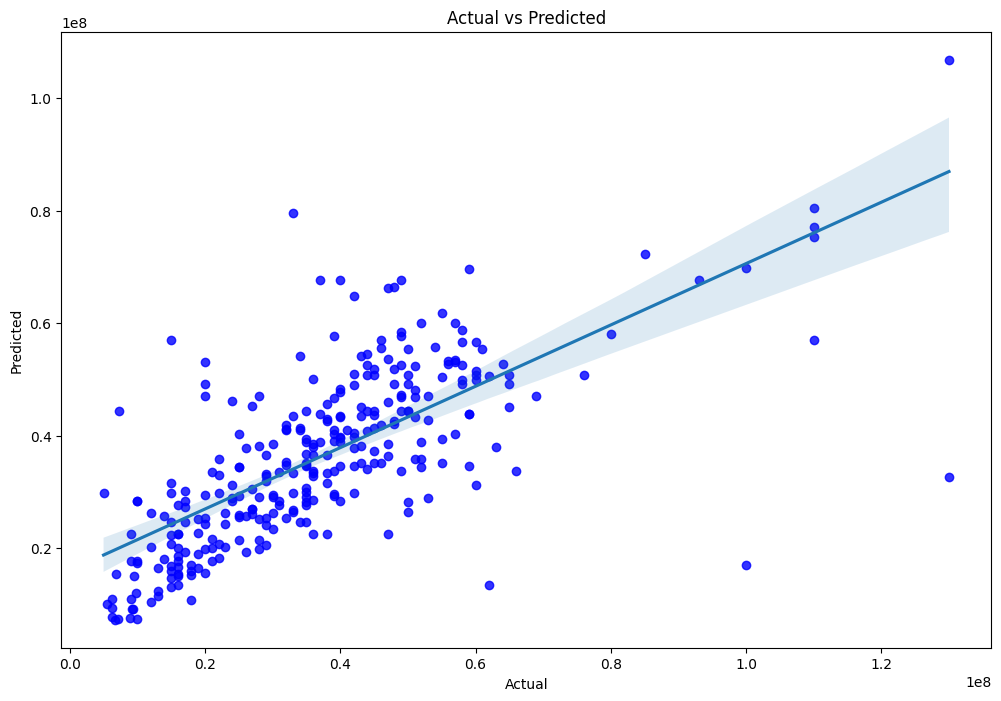

In [105]:
# Plot the actual vs predicted values using seaborn scatterplot with best fit line
plt.figure(figsize=(12, 8))
sns.regplot(
    x=Katsushika_y_test, y=Katsushika_rf_prediction, scatter_kws={"color": "blue"}
)
plt.title("Actual vs Predicted")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()


## Elasticnet

###   Elasticnet For Overall Dataset

In [106]:
print("Evaluation for ElasticNet".center(75, "_"))

elastic_model = ElasticNet()
elastic_model.fit(X_train, y_train)

elastic_prediction = elastic_model.predict(X_test)
elastic_mse = mean_squared_error(y_test, elastic_prediction)
elastic_mae = mean_absolute_error(y_test, elastic_prediction)
elastic_r2 = r2_score(y_test, elastic_prediction)
elastic_mape = mean_absolute_percentage_error(y_test, elastic_prediction)
elastic_medae = median_absolute_error(y_test, elastic_prediction)
elastic_rmse = root_mean_squared_error(y_test, elastic_prediction)

print("_" * 75)
print(f"Mean Squared Error: {elastic_mse}")
print(f"Mean Absolute Error: {elastic_mae}")
print(f"R2 Score: {elastic_r2}")
print(f"Mean Absolute Percentage Error: {elastic_mape}")
print(f"Median Absolute Error: {elastic_medae}")
print(f"Root Mean Squared Error: {elastic_rmse}")

print("_" * 75)

_________________________Evaluation for ElasticNet_________________________
___________________________________________________________________________
Mean Squared Error: 506499049671765.25
Mean Absolute Error: 17306931.460182067
R2 Score: 0.3097219767318703
Mean Absolute Percentage Error: 0.6554332482873201
Median Absolute Error: 14431342.431520246
Root Mean Squared Error: 22505533.756651167
___________________________________________________________________________


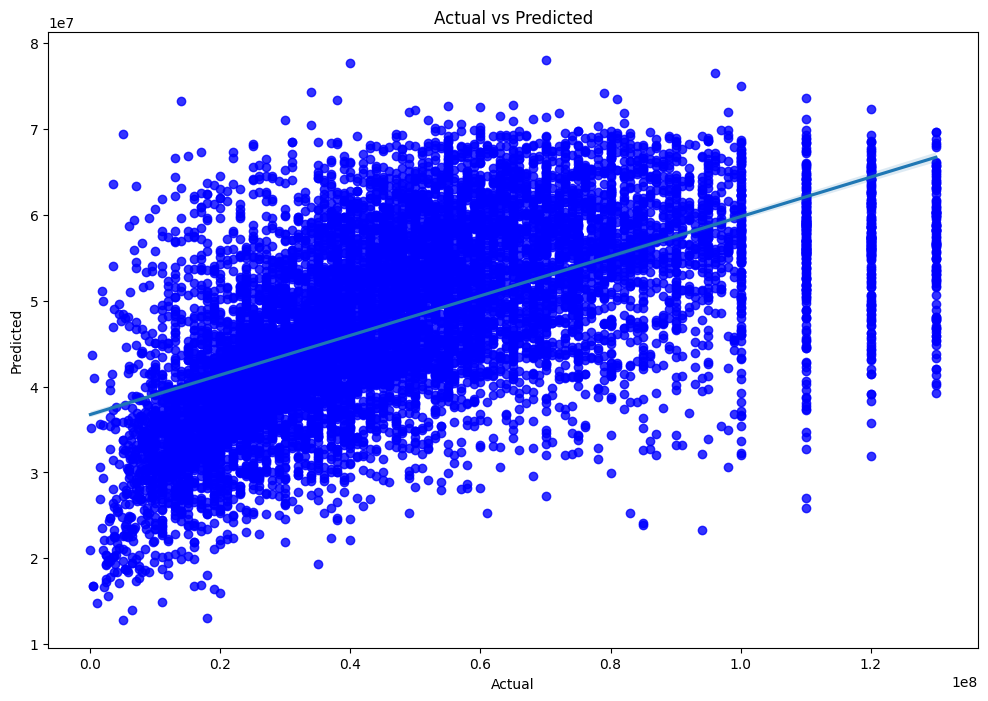

In [107]:
# Plot the actual vs predicted values using seaborn scatterplot with best fit line
plt.figure(figsize=(12, 8))
sns.regplot(x=y_test, y=elastic_prediction, scatter_kws={"color": "blue"})
plt.title("Actual vs Predicted")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

###  Elasticnet For Minato Ward

In [108]:
print("Evaluation for ElasticNet".center(75, "_"))

minato_elastic_model = ElasticNet()
minato_elastic_model.fit(minato_X_train, minato_y_train)

minato_elastic_prediction = minato_elastic_model.predict(minato_X_test)
minato_elastic_mse = mean_squared_error(minato_y_test, minato_elastic_prediction)
minato_elastic_mae = mean_absolute_error(minato_y_test, minato_elastic_prediction)
minato_elastic_r2 = r2_score(minato_y_test, minato_elastic_prediction)
minato_elastic_mape = mean_absolute_percentage_error(
    minato_y_test, minato_elastic_prediction
)
minato_elastic_medae = median_absolute_error(minato_y_test, minato_elastic_prediction)
minato_elastic_rmse = root_mean_squared_error(minato_y_test, minato_elastic_prediction)

print("_" * 75)
print(f"Mean Squared Error: {minato_elastic_mse}")
print(f"Mean Absolute Error: {minato_elastic_mae}")
print(f"R2 Score: {minato_elastic_r2}")
print(f"Mean Absolute Percentage Error: {minato_elastic_mape}")
print(f"Median Absolute Error: {minato_elastic_medae}")
print(f"Root Mean Squared Error: {minato_elastic_rmse}")

print("_" * 75)

_________________________Evaluation for ElasticNet_________________________
___________________________________________________________________________
Mean Squared Error: 566129930138590.9
Mean Absolute Error: 17270601.520664737
R2 Score: 0.5227882444715501
Mean Absolute Percentage Error: 0.3934483794715632
Median Absolute Error: 13559629.89280285
Root Mean Squared Error: 23793485.035584655
___________________________________________________________________________


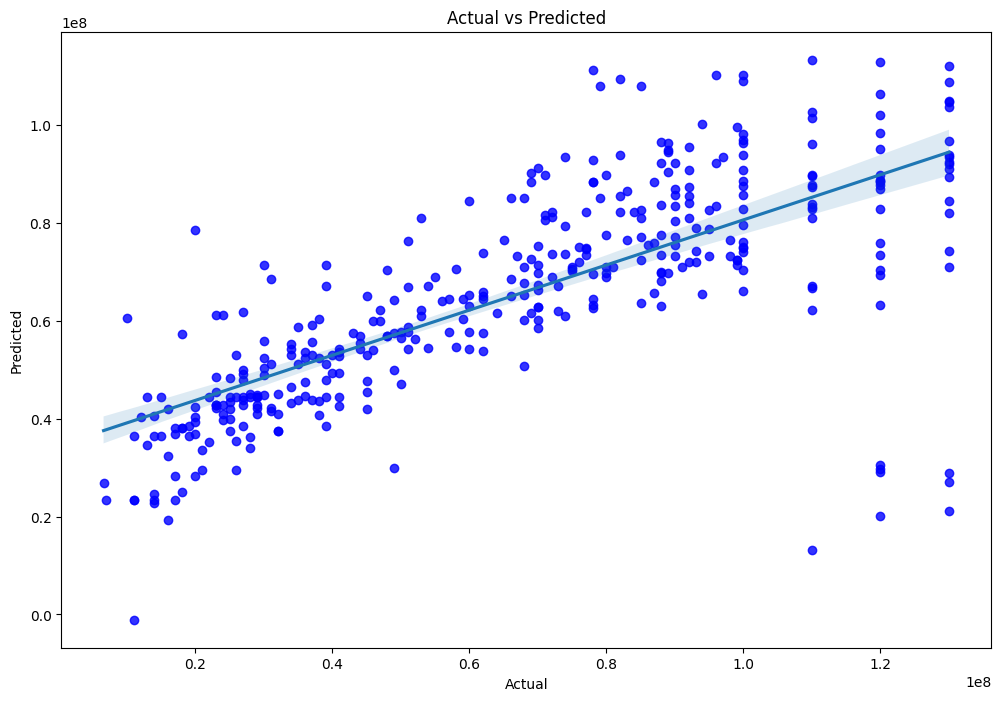

In [109]:
# Plot the actual vs predicted values using seaborn scatterplot with best fit line
plt.figure(figsize=(12, 8))
sns.regplot(
    x=minato_y_test, y=minato_elastic_prediction, scatter_kws={"color": "blue"}
)
plt.title("Actual vs Predicted")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

###  Elasticnet For Katsushika Ward

In [110]:
print("Evaluation for ElasticNet".center(75, "_"))

Katsushika_elastic_model = ElasticNet()
Katsushika_elastic_model.fit(Katsushika_X_train, Katsushika_y_train)

Katsushika_elastic_prediction = Katsushika_elastic_model.predict(Katsushika_X_test)
Katsushika_elastic_mse = mean_squared_error(
    Katsushika_y_test, Katsushika_elastic_prediction
)
Katsushika_elastic_mae = mean_absolute_error(
    Katsushika_y_test, Katsushika_elastic_prediction
)
Katsushika_elastic_r2 = r2_score(Katsushika_y_test, Katsushika_elastic_prediction)
Katsushika_elastic_mape = mean_absolute_percentage_error(
    Katsushika_y_test, Katsushika_elastic_prediction
)
Katsushika_elastic_medae = median_absolute_error(
    Katsushika_y_test, Katsushika_elastic_prediction
)
Katsushika_elastic_rmse = root_mean_squared_error(
    Katsushika_y_test, Katsushika_elastic_prediction
)

print("_" * 75)
print(f"Mean Squared Error: {Katsushika_elastic_mse}")
print(f"Mean Absolute Error: {Katsushika_elastic_mae}")
print(f"R2 Score: {Katsushika_elastic_r2}")
print(f"Mean Absolute Percentage Error: {Katsushika_elastic_mape}")
print(f"Median Absolute Error: {Katsushika_elastic_medae}")
print(f"Root Mean Squared Error: {Katsushika_elastic_rmse}")

print("_" * 75)

_________________________Evaluation for ElasticNet_________________________
___________________________________________________________________________
Mean Squared Error: 301166612146141.8
Mean Absolute Error: 11671610.65927091
R2 Score: 0.27921124882131176
Mean Absolute Percentage Error: 0.49104175338633593
Median Absolute Error: 8483634.975790612
Root Mean Squared Error: 17354152.590839513
___________________________________________________________________________


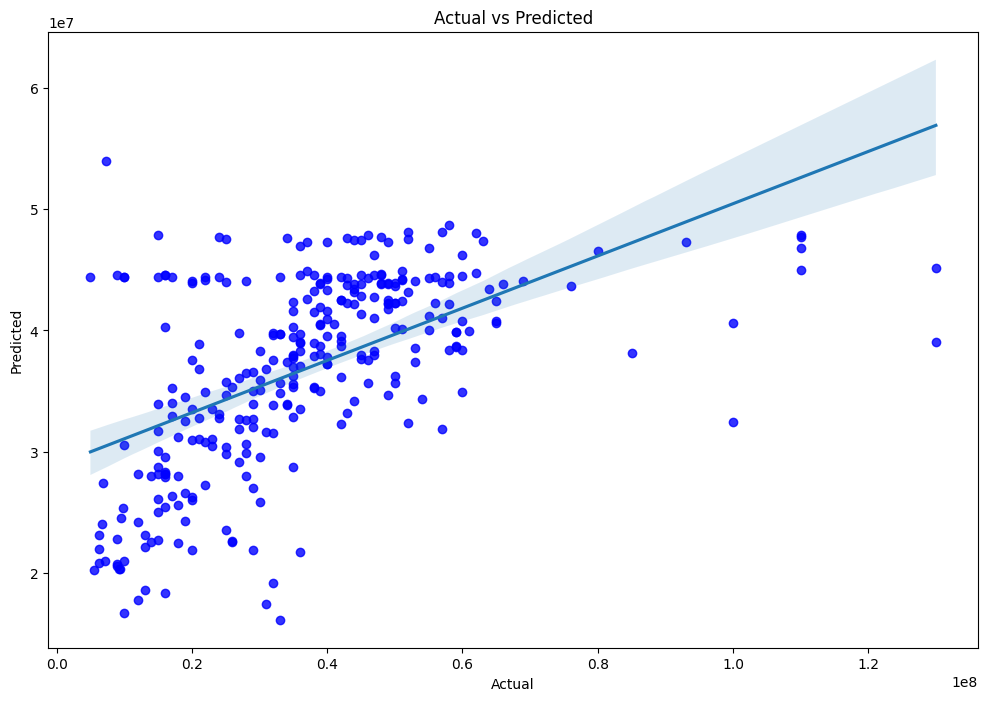

In [111]:
# Plot the actual vs predicted values using seaborn scatterplot with best fit line
plt.figure(figsize=(12, 8))
sns.regplot(
    x=Katsushika_y_test, y=Katsushika_elastic_prediction, scatter_kws={"color": "blue"}
)
plt.title("Actual vs Predicted")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()


##  Recurrent Neural Network

### Recurrent Neural Network for Overall Dataset

In [112]:
print("Evaluation for Neural Network".center(75, "_"))

model = Sequential()
model.add(Dense(128, activation="relu", input_shape=(X_train.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(32, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer=Adam(learning_rate=0.01), loss="mean_squared_error")

early_stopping = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=64, callbacks=[early_stopping])

_______________________Evaluation for Neural Network_______________________
Epoch 1/20
703/703 ━━━━━━━━━━━━━━━━━━━━ 1s 963us/step - loss: 2032858084409344.0000 - val_loss: 450177534001152.0000
Epoch 2/20
703/703 ━━━━━━━━━━━━━━━━━━━━ 1s 835us/step - loss: 514680426594304.0000 - val_loss: 406769775935488.0000
Epoch 3/20
703/703 ━━━━━━━━━━━━━━━━━━━━ 1s 824us/step - loss: 453125794168832.0000 - val_loss: 362094465646592.0000
Epoch 4/20
703/703 ━━━━━━━━━━━━━━━━━━━━ 1s 875us/step - loss: 437049698025472.0000 - val_loss: 348248766152704.0000
Epoch 5/20
703/703 ━━━━━━━━━━━━━━━━━━━━ 1s 813us/step - loss: 429461363228672.0000 - val_loss: 343267040296960.0000
Epoch 6/20
703/703 ━━━━━━━━━━━━━━━━━━━━ 1s 812us/step - loss: 413061097717760.0000 - val_loss: 338875234910208.0000
Epoch 7/20
703/703 ━━━━━━━━━━━━━━━━━━━━ 1s 811us/step - loss: 419211289559040.0000 - val_loss: 337276768878592.0000
Epoch 8/20
703/703 ━━━━━━━━━━━━━━━━━━━━ 1s 820us/step - loss: 413258867539968.0000 - val_loss: 336299831590912.

In [113]:
nn_prediction = model.predict(X_test)
nn_mse = mean_squared_error(y_test, nn_prediction)
nn_mae = mean_absolute_error(y_test, nn_prediction)
nn_r2 = r2_score(y_test, nn_prediction)
nn_mape = mean_absolute_percentage_error(y_test, nn_prediction)
nn_medae = median_absolute_error(y_test, nn_prediction)
nn_rmse = root_mean_squared_error(y_test, nn_prediction)

print("_" * 75)
print(f"Mean Squared Error: {nn_mse}")
print(f"Mean Absolute Error: {nn_mae}")
print(f"R2 Score: {nn_r2}")
print(f"Mean Absolute Percentage Error: {nn_mape}")
print(f"Median Absolute Error: {nn_medae}")
print(f"Root Mean Squared Error: {nn_rmse}")
print("_" * 75)

352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 465us/step
___________________________________________________________________________
Mean Squared Error: 326789816884637.7
Mean Absolute Error: 12669805.094244797
R2 Score: 0.5546372121142866
Mean Absolute Percentage Error: 0.4462112324685154
Median Absolute Error: 8787321.0
Root Mean Squared Error: 18077328.80944078
___________________________________________________________________________


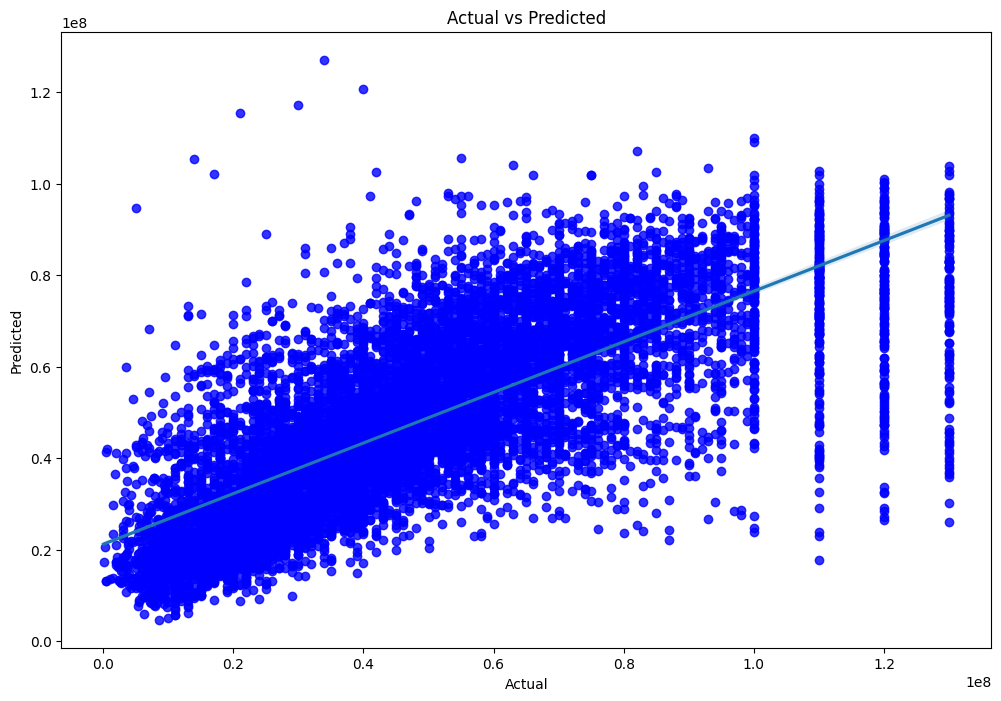

In [114]:
# Plot the actual vs predicted values using seaborn scatterplot with best fit line
plt.figure(figsize=(12, 8))
sns.regplot(x=y_test, y=nn_prediction, scatter_kws={"color": "blue"})
plt.title("Actual vs Predicted")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

###  Recurrent Neural Network for Minato Ward

In [115]:
print("Evaluation for Neural Network".center(75, "_"))

minato_model = Sequential()
minato_model.add(Dense(128, activation="relu", input_shape=(minato_X_train.shape[1],)))
minato_model.add(Dropout(0.2))
minato_model.add(Dense(64, activation="relu"))
minato_model.add(Dropout(0.2))
minato_model.add(Dense(32, activation="relu"))
minato_model.add(Dropout(0.2))
minato_model.add(Dense(1))

minato_model.compile(optimizer=Adam(learning_rate=0.01), loss="mean_squared_error")

minato_early_stopping = EarlyStopping(
    monitor="val_loss", patience=5, restore_best_weights=True
)

minato_history = minato_model.fit(
    minato_X_train,
    minato_y_train,
    validation_data=(minato_X_test, minato_y_test),
    epochs=20,
    batch_size=64,
    callbacks=[minato_early_stopping],
)

_______________________Evaluation for Neural Network_______________________
Epoch 1/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 5552552510750720.0000 - val_loss: 5521445673238528.0000
Epoch 2/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5443852794068992.0000 - val_loss: 5519307853266944.0000
Epoch 3/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5386687853101056.0000 - val_loss: 5503379967049728.0000
Epoch 4/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5369474697920512.0000 - val_loss: 5437729244446720.0000
Epoch 5/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5552174553628672.0000 - val_loss: 5248699143815168.0000
Epoch 6/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5049042220351488.0000 - val_loss: 4827598538407936.0000
Epoch 7/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4648115076333568.0000 - val_loss: 4052425929392128.0000
Epoch 8/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3588426653761536.0000 - val_loss: 2953351851409408.0000
Epoch 9/20
2

In [116]:
minato_nn_prediction = minato_model.predict(minato_X_test)
minato_nn_mse = mean_squared_error(minato_y_test, minato_nn_prediction)
minato_nn_mae = mean_absolute_error(minato_y_test, minato_nn_prediction)
minato_nn_r2 = r2_score(minato_y_test, minato_nn_prediction)
minato_nn_mape = mean_absolute_percentage_error(minato_y_test, minato_nn_prediction)
minato_nn_medae = median_absolute_error(minato_y_test, minato_nn_prediction)
minato_nn_rmse = root_mean_squared_error(minato_y_test, minato_nn_prediction)

print("_" * 75)
print(f"Mean Squared Error: {minato_nn_mse}")
print(f"Mean Absolute Error: {minato_nn_mae}")
print(f"R2 Score: {minato_nn_r2}")
print(f"Mean Absolute Percentage Error: {minato_nn_mape}")
print(f"Median Absolute Error: {minato_nn_medae}")
print(f"Root Mean Squared Error: {minato_nn_rmse}")
print("_" * 75)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
___________________________________________________________________________
Mean Squared Error: 521350751894793.75
Mean Absolute Error: 14642128.908616189
R2 Score: 0.560534261990201
Mean Absolute Percentage Error: 0.2743364638892673
Median Absolute Error: 9263952.0
Root Mean Squared Error: 22833106.488053564
___________________________________________________________________________


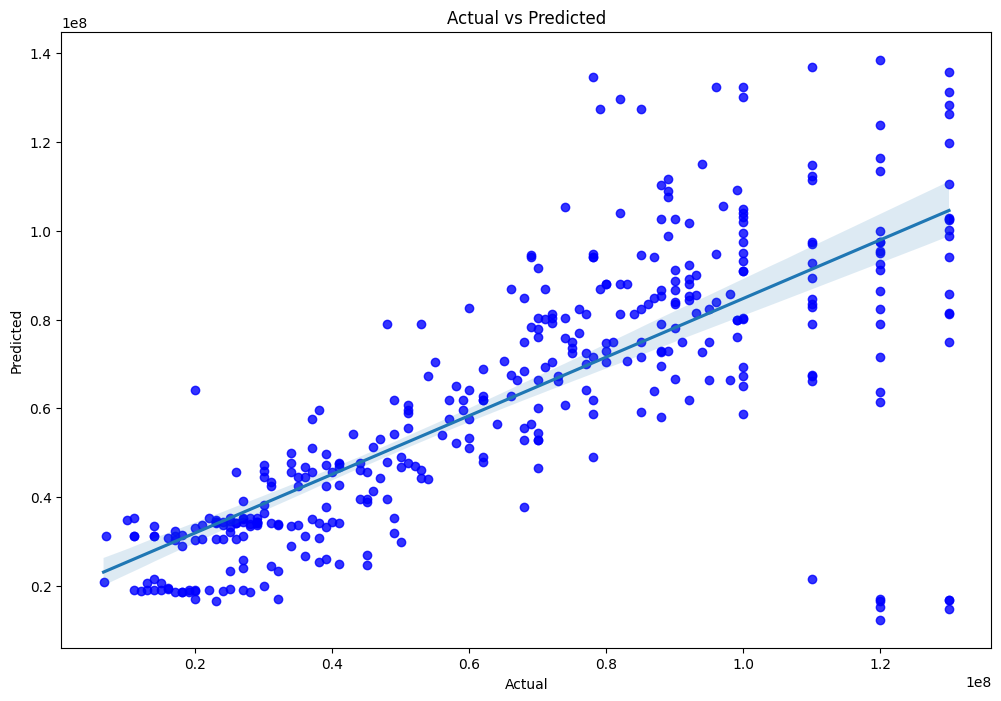

In [117]:
# Plot the actual vs predicted values using seaborn scatterplot with best fit line
plt.figure(figsize=(12, 8))
sns.regplot(
    x=minato_y_test, y=minato_nn_prediction, scatter_kws={"color": "blue"}
)
plt.title("Actual vs Predicted")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()


### Recurrent Neural Network for Katsushika Ward

In [118]:
print("Evaluation for Neural Network".center(75, "_"))

Katsushika_model = Sequential()
Katsushika_model.add(
    Dense(128, activation="relu", input_shape=(Katsushika_X_train.shape[1],))
)
Katsushika_model.add(Dropout(0.2))
Katsushika_model.add(Dense(64, activation="relu"))
Katsushika_model.add(Dropout(0.2))
Katsushika_model.add(Dense(32, activation="relu"))
Katsushika_model.add(Dropout(0.2))
Katsushika_model.add(Dense(1))

Katsushika_model.compile(optimizer=Adam(learning_rate=0.01), loss="mean_squared_error")

Katsushika_early_stopping = EarlyStopping(
    monitor="val_loss", patience=5, restore_best_weights=True
)

Katsushika_history = Katsushika_model.fit(
    Katsushika_X_train,
    Katsushika_y_train,
    validation_data=(Katsushika_X_test, Katsushika_y_test),
    epochs=20,
    batch_size=64,
    callbacks=[Katsushika_early_stopping],
)

_______________________Evaluation for Neural Network_______________________
Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1678562339848192.0000 - val_loss: 1790174581227520.0000
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1702736697491456.0000 - val_loss: 1789604290101248.0000
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1704177793236992.0000 - val_loss: 1785601380581376.0000
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1626964616019968.0000 - val_loss: 1769179573125120.0000
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1686908937699328.0000 - val_loss: 1721201701421056.0000
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1549906728714240.0000 - val_loss: 1613277360553984.0000
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1479223780835328.0000 - val_loss: 1413104235708416.0000
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1235450966573056.0000 - val_loss: 1118843409793024.0000
Epoch 9/20
2

In [119]:
Katsushika_nn_prediction = Katsushika_model.predict(Katsushika_X_test)
Katsushika_nn_mse = mean_squared_error(Katsushika_y_test, Katsushika_nn_prediction)
Katsushika_nn_mae = mean_absolute_error(Katsushika_y_test, Katsushika_nn_prediction)
Katsushika_nn_r2 = r2_score(Katsushika_y_test, Katsushika_nn_prediction)
Katsushika_nn_mape = mean_absolute_percentage_error(
    Katsushika_y_test, Katsushika_nn_prediction
)
Katsushika_nn_medae = median_absolute_error(Katsushika_y_test, Katsushika_nn_prediction)
Katsushika_nn_rmse = root_mean_squared_error(
    Katsushika_y_test, Katsushika_nn_prediction
)

print("_" * 75)
print(f"Mean Squared Error: {Katsushika_nn_mse}")
print(f"Mean Absolute Error: {Katsushika_nn_mae}")
print(f"R2 Score: {Katsushika_nn_r2}")
print(f"Mean Absolute Percentage Error: {Katsushika_nn_mape}")
print(f"Median Absolute Error: {Katsushika_nn_medae}")
print(f"Root Mean Squared Error: {Katsushika_nn_rmse}")
print("_" * 75)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
___________________________________________________________________________
Mean Squared Error: 304219691944532.7
Mean Absolute Error: 11257697.081967212
R2 Score: 0.27190424503543664
Mean Absolute Percentage Error: 0.4416945087210822
Median Absolute Error: 7170920.0
Root Mean Squared Error: 17441894.73493441
___________________________________________________________________________


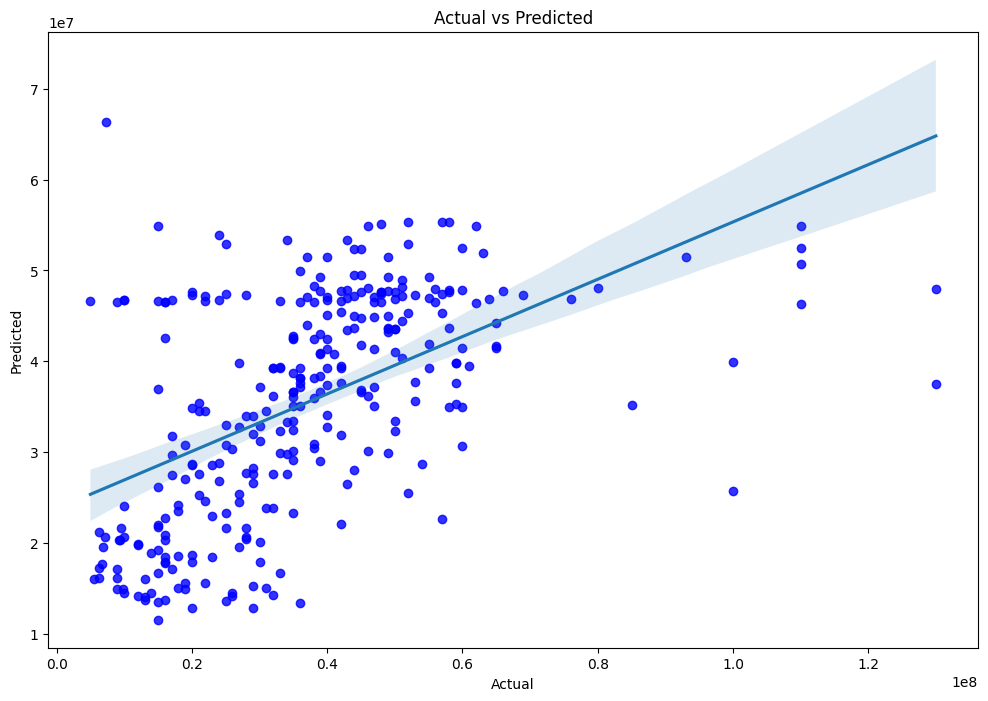

In [120]:
# Plot the actual vs predicted values using seaborn scatterplot with best fit line
plt.figure(figsize=(12, 8))
sns.regplot(
    x=Katsushika_y_test, y=Katsushika_nn_prediction, scatter_kws={"color": "blue"}
)
plt.title("Actual vs Predicted")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()
